# Visualizing Earnings Based On College Majors

## Introduction

### Preliminary

This Notebook is the conclusion of the ***Exploratory Data vizualisation course*** from [dataquest.io](dataquest.io). It is a guided project whose aim is to use all the techniques and skills learnt during the course. Nevertheless we are dealing with real-word data: in our case a [dataset](https://github.com/fivethirtyeight/data/tree/master/college-majors) that was first realesed by the **American Institute Survey** and then clenead and published by FiveThirtyEight.
> I am sometimes using blockquotes as this one, meaning that for the rest of the project I am quoting some elements given by dataquest. For the sake of simplicity and clarity, I estimated that they did not need any reformulation and were immediately usable and convenient for me and the reader.

### Context

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012 : `recent-grads.csv`.  


>Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

>- Rank- Rank by median earnings (the dataset is ordered by this column).
>- Major_code - Major code.
>- Major - Major description.
>- Major_category - Category of major.
>- Total - Total number of people with major.
>- Sample_size - Sample size (unweighted) of full-time.
>- Men - Male graduates.
>- Women - Female graduates.
>- ShareWomen - Women as share of total.
>- Employed - Number employed.
>- Median - Median salary of full-time, year-round workers.
>- Low_wage_jobs - Number in low-wage service jobs.
>- Full_time - Number employed 35 hours or more.
>- Part_time - Number employed less than 35 hours.


Using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money?
        Using scatter plots
- How many majors are predominantly male? Predominantly female?
        Using histograms
- Which category of majors have the most students?
        Using bar plots

We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

## Data Cleaning

In [49]:
import pandas as pd
import matplotlib as plt

%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')

In [50]:
print(recent_grads.iloc[0])
print(recent_grads.head(5))
print(recent_grads.tail(5))

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

In [51]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [52]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [53]:
raw_data_count = recent_grads.shape[0]
print('There are {} rows in the original data set.'.format(raw_data_count))

There are 173 rows in the original data set


In [55]:
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print('There are {} rows in the data set, after dropping rows with non-values.'.format(cleaned_data_count))

There are 172 rows in the data set, after dropping rows with non-values.


## Plotting a few relations within our Data Set

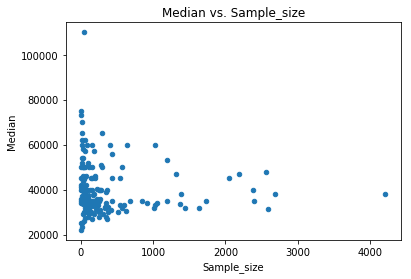

In [63]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', 
                  title='Median vs. Sample_size')

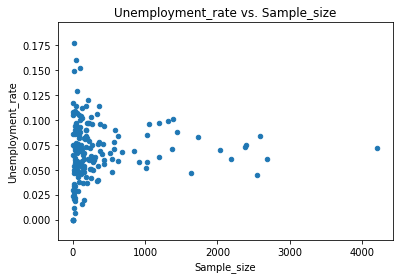

In [64]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', 
                  title='Unemployment_rate vs. Sample_size')

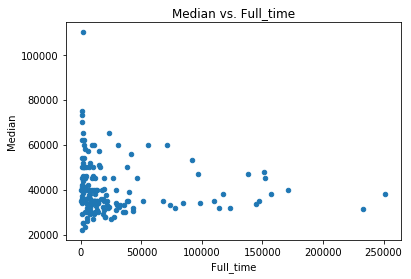

In [65]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', 
                  title='Median vs. Full_time')

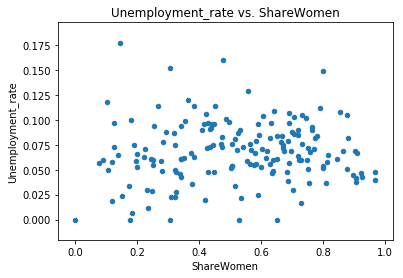

In [66]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', 
                  title='Unemployment_rate vs. ShareWomen')

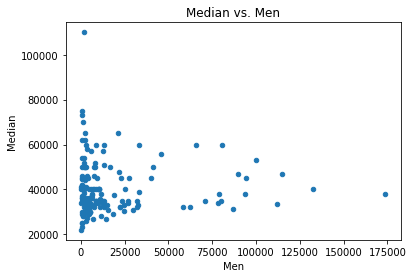

In [67]:
recent_grads.plot(x='Men', y='Median', kind='scatter', 
                  title='Median vs. Men')

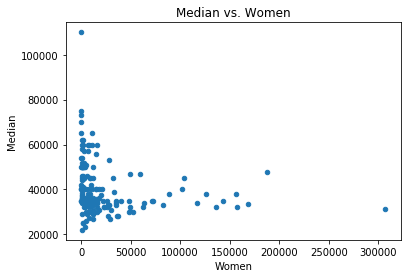

In [68]:
recent_grads.plot(x='Women', y='Median', kind='scatter', 
                  title='Median vs. Women')

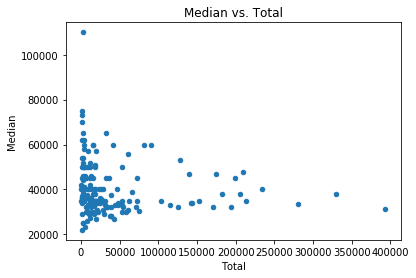

In [75]:
recent_grads.plot(x='Total', y='Median', kind='scatter', 
                  title='Median vs. Total')

When plotting the Median Salary vs the Total, one can conclude that students in more popular major don't make more money than the ones in less popular. Indeed we can even see that there might be a negative correlation betweens the Median salary and the total of persons studying a major but it's not very clear.

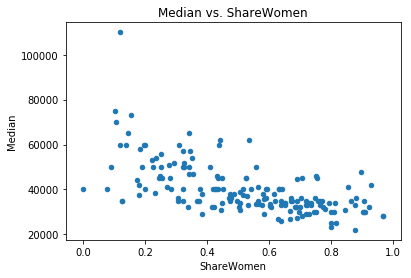

In [76]:
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter', 
                  title='Median vs. ShareWomen')

When plotting the Median Salary vs the ShareWomen, one can conclude that students that majored in subjects that were majority female did not make more money than the others. . Indeed we can even see that there is be a negative correlation betweens the Median salary and the proportion of women by major.

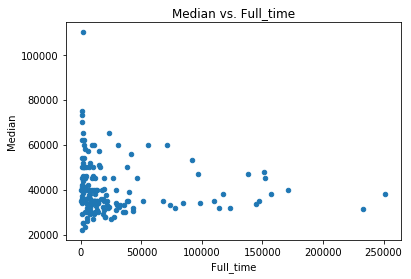

In [77]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', 
                  title='Median vs. Full_time')

When plotting the Median Salary vs. the Number of full-time employed, it is not very clear that there exists a link between them. Indeed it is difficult to draw a trend the Median Salary values are widely spread for Major having very few persons being full time employees. Overall there seems to be a negative correlation between them.

## Plotting some data set columns histograms

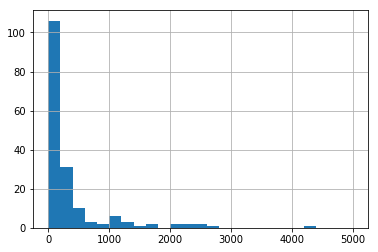

In [91]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

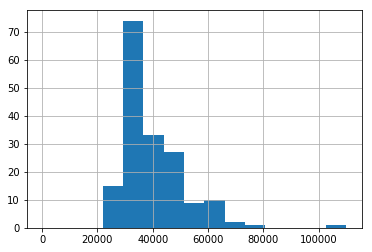

In [102]:
recent_grads['Median'].hist(bins=15, range=(0,110000))

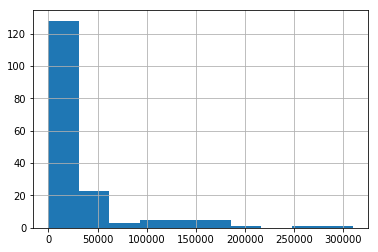

In [106]:
recent_grads['Employed'].hist(bins=10, range=(0,310000))

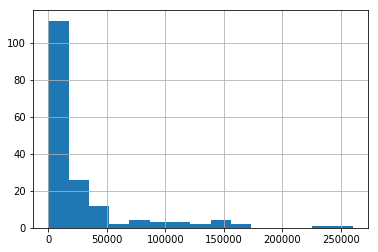

In [109]:
recent_grads['Full_time'].hist(bins=15, range=(0,260000))

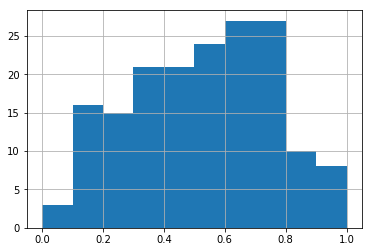

In [111]:
recent_grads['ShareWomen'].hist(bins=10,range=(0,1))

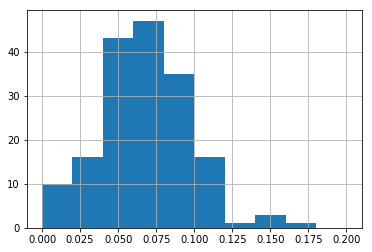

In [115]:
recent_grads['Unemployment_rate'].hist(bins=10,range=(0,0.2))

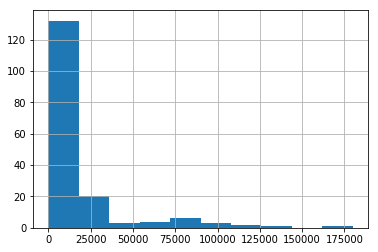

In [126]:
recent_grads['Men'].hist(bins=10,range=(0,180000))

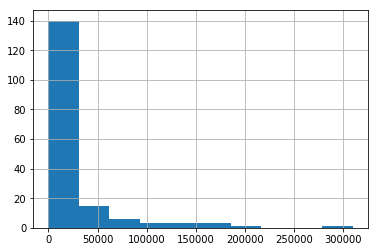

In [128]:
recent_grads['Women'].hist(bins=10,range=(0,310000))

In [127]:
recent_grads['Women'].describe()

count       172.000000
mean      22646.674419
std       41057.330740
min           0.000000
25%        1778.250000
50%        8386.500000
75%       22553.750000
max      307087.000000
Name: Women, dtype: float64

### Scatter Matrix Plots

In [129]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12238e048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1224f64a8>]], dtype=object)

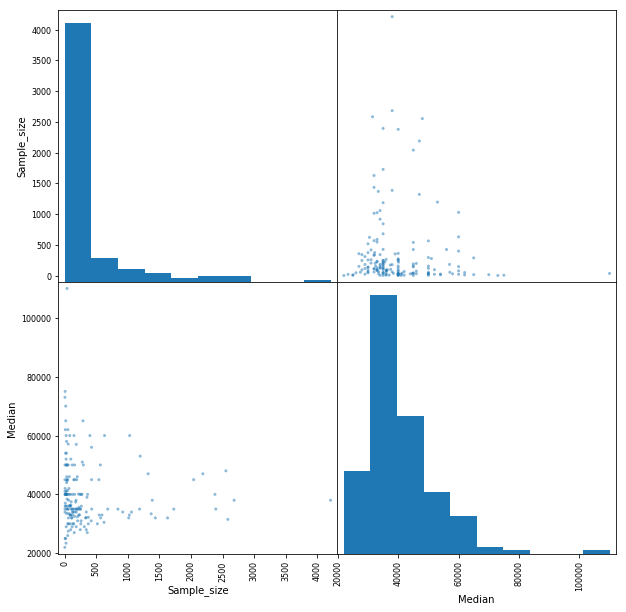

In [131]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12238bcf8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122b21e80>]], dtype=object)

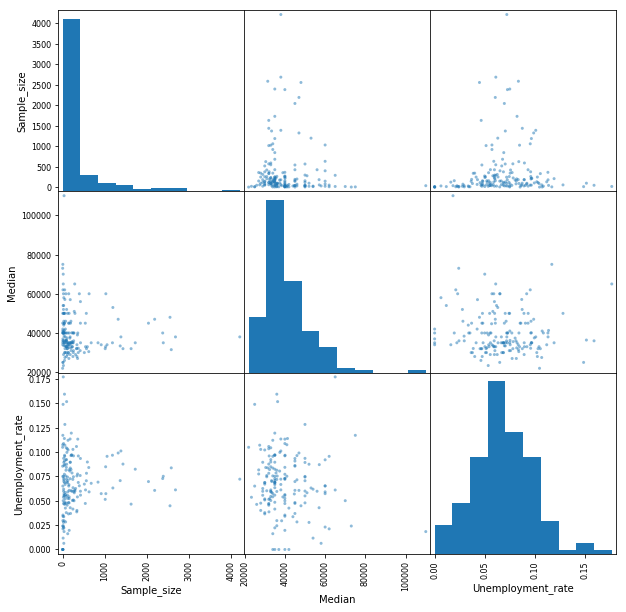

In [133]:
scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1235ee470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x124278208>]], dtype=object)

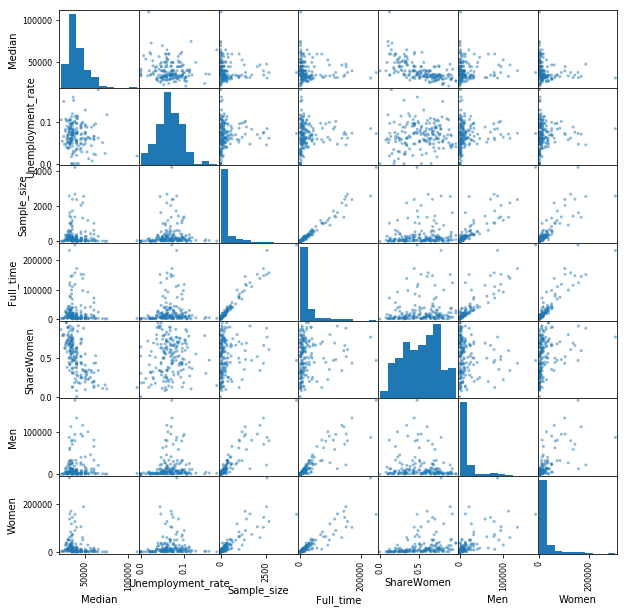

In [135]:
scatter_matrix(recent_grads[['Median','Unemployment_rate','Sample_size','Full_time','ShareWomen','Men','Women']], figsize=(10,10))


### Bar plots in Pandas

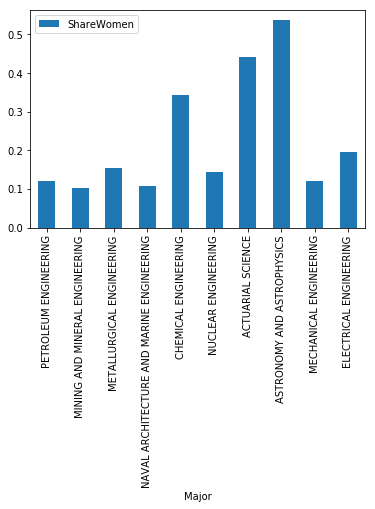

In [136]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')

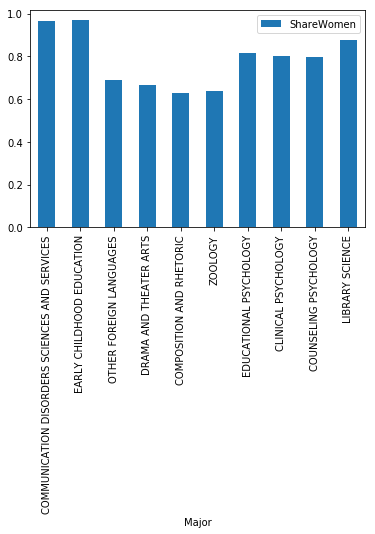

In [139]:
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')

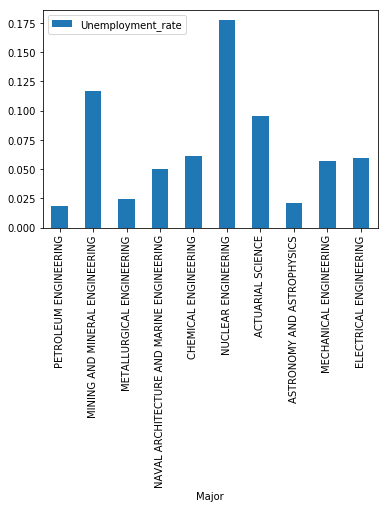

In [140]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')

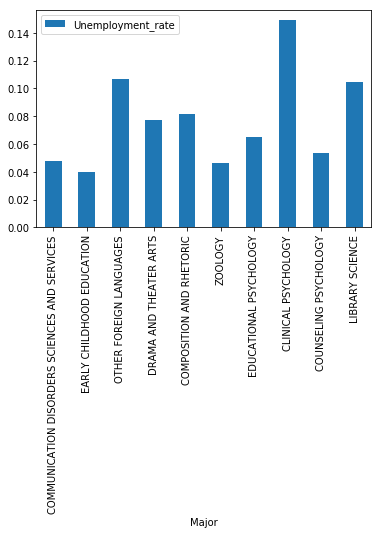

In [141]:
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')